In [1]:
print(
'''
***********************
*   Clustering Task   *
***********************
'''
)


***********************
*   Clustering Task   *
***********************



In [2]:
# Install packages

!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [3]:
# Suppress all warnings

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from scipy.stats import zscore
import scipy.cluster.hierarchy as sch

import os
os.environ['OMP_NUM_THREADS']='1'

In [5]:
# Load the dataset

dataset=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [6]:
# Exploratory Data Analysis (EDA)

In [7]:
# View dimensions of dataset

dataset.shape

(2111, 17)

In [8]:
# Preview the dataset

dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
# Preview the dataset

dataset.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [10]:
# Check the dataset information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2110 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2109 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [11]:
# View summary of the distribution of values in numerical columns

dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2110.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701678,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093327,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700563,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768479,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [12]:
# Check the names of the columns

dataset.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [13]:
# Correct the numerical feature scale

dataset['Height']=dataset['Height']*100

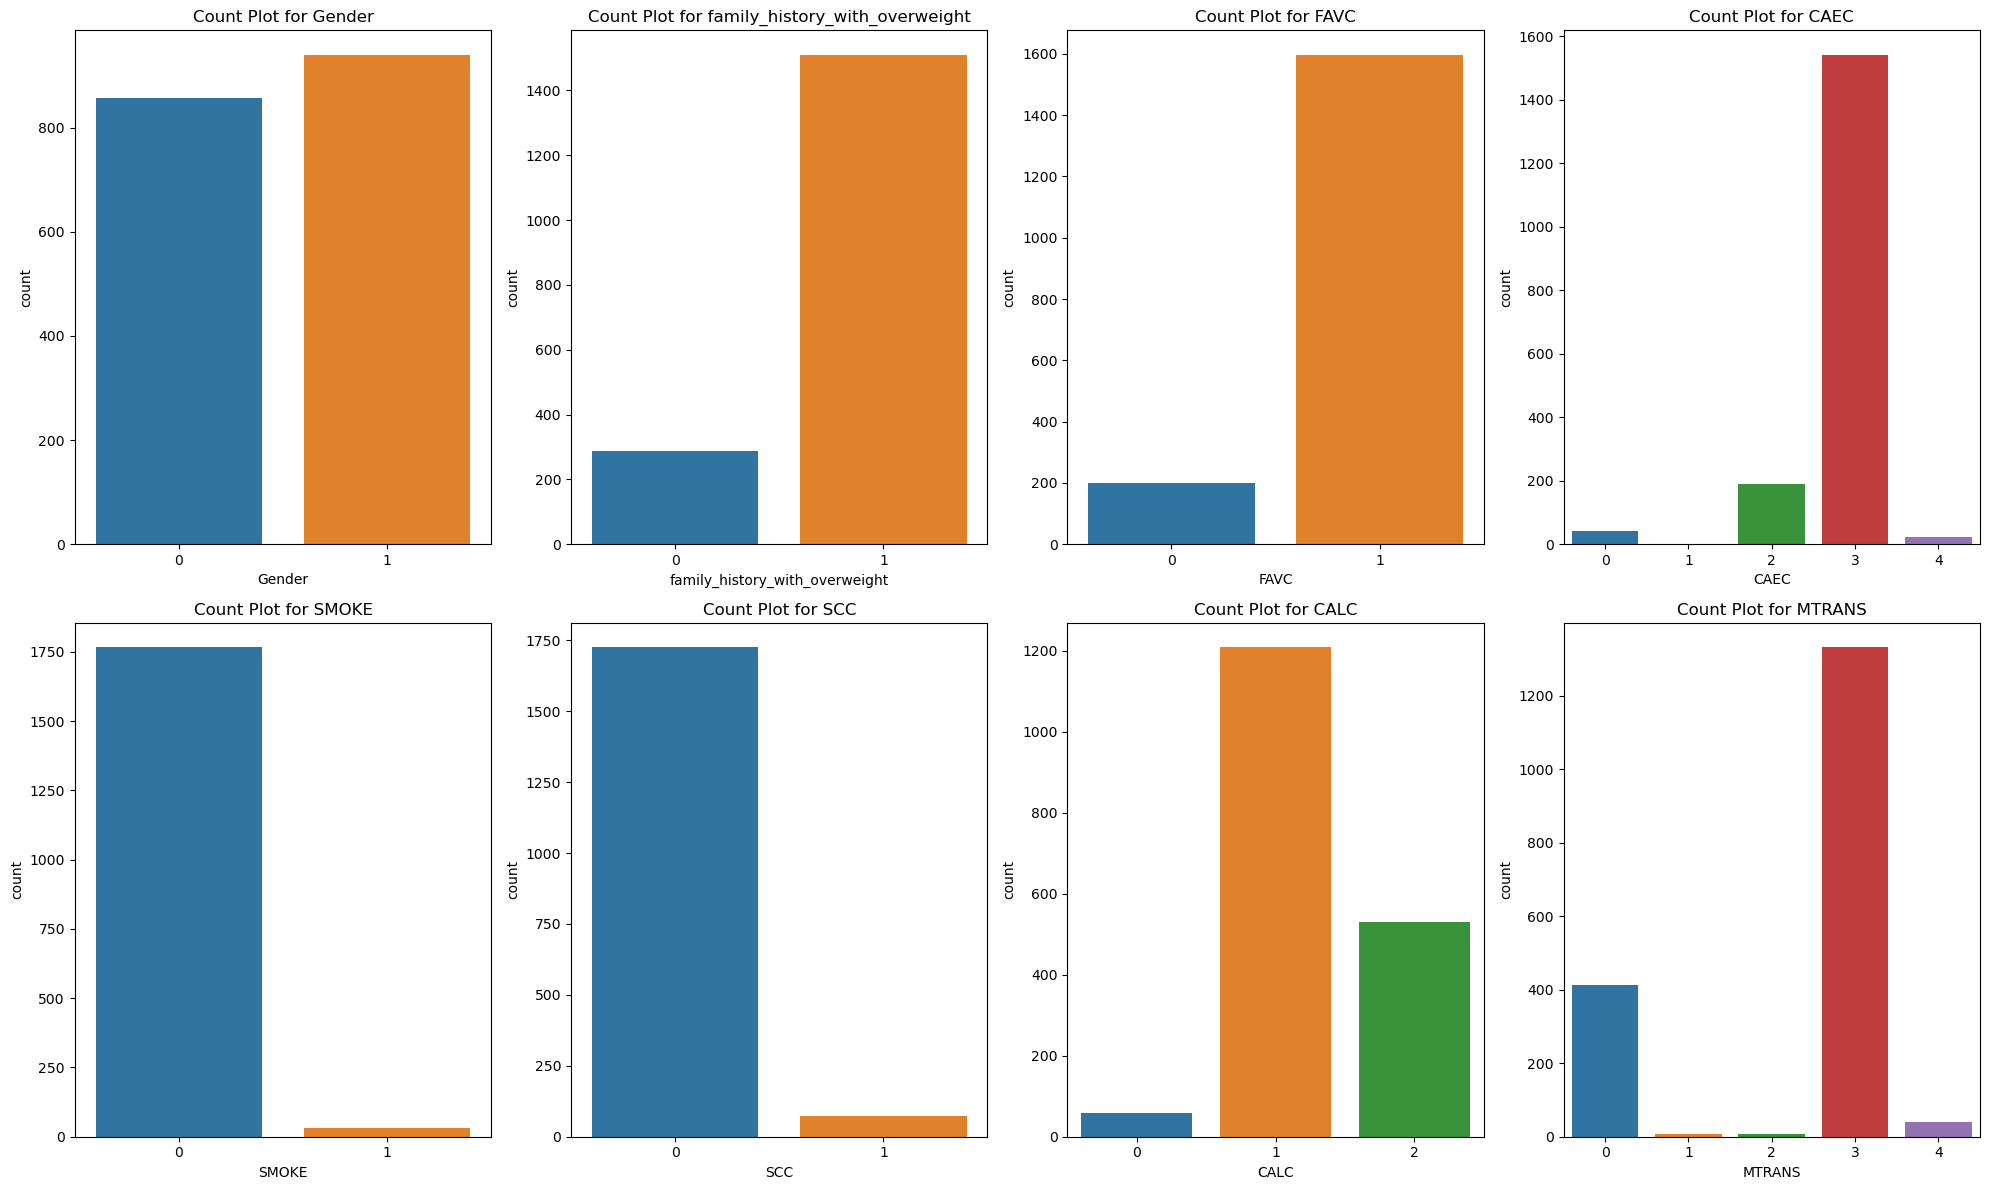

In [55]:
# Visualizing the distribution of various categorical features

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

num_rows = len(categorical_features) // 4
if len(categorical_features) % 4 != 0:
    num_rows += 1

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 6 * num_rows))

axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=dataset[feature], ax=axes[i])
    axes[i].set_title(f'Count Plot for {feature}')

for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

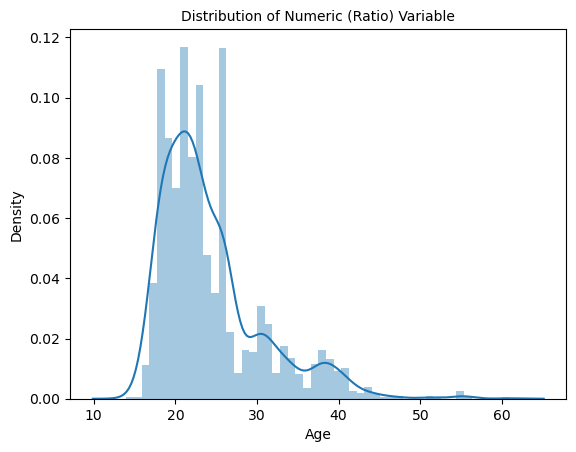

In [16]:
# Ratio variable distribution 

sns.distplot(dataset["Age"], kde=True)
plt.title("Distribution of Numeric (Ratio) Variable", fontsize=10)
plt.show()

In [17]:
# Data Cleaning

In [18]:
# Check missing values

dataset.iloc[:,:].isnull().values.any()

True

In [19]:
# Count of missing values in each column

dataset.isnull().sum()

Gender                            0
Age                               0
Height                            1
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              2
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            1
NObeyesdad                        0
dtype: int64

In [20]:
# Handle missing values

numImputer=SimpleImputer(missing_values=np.nan , strategy='mean')
numImputer=numImputer.fit(dataset[['Height']])
dataset[['Height']]=numImputer.transform(dataset[['Height']])
catImputer=SimpleImputer(missing_values=np.nan ,strategy='most_frequent')
catImputer=catImputer.fit([['CAEC','MTRANS']])
dataset[['CAEC','MTRANS']]=catImputer.transform(dataset[['CAEC','MTRANS']])
dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,162.0000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,152.0000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,180.0000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,180.0000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,178.0000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,171.0730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,174.8584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,175.2206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,173.9450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


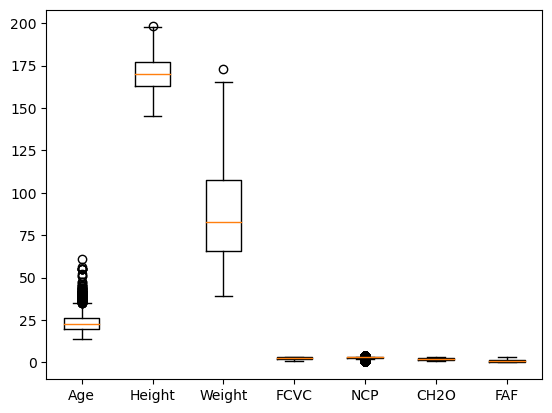

In [21]:
# Visualizing the distribution of various categorical features

plt.boxplot(x=[dataset['Age'], dataset['Height'], dataset['Weight'], dataset['FCVC'], dataset['NCP'], dataset['CH2O'], dataset['FAF']])
plt.xticks([1,2,3,4,5,6,7],['Age', 'Height', 'Weight','FCVC', 'NCP', 'CH2O', 'FAF'])

plt.show()

In [22]:
# Drop outliers step by step

numeric_feature = 'Weight'
z_scores = zscore(dataset[numeric_feature])
threshold = 3
outlier_indices = abs(z_scores) > threshold
dataset = dataset.loc[~outlier_indices]

print(f"Shape after dropping outliers: {dataset.shape}")

Shape after dropping outliers: (2110, 17)


In [23]:
# Drop outliers step by step

numeric_feature = 'Height'
z_scores = zscore(dataset[numeric_feature])
threshold = 2
outlier_indices = abs(z_scores) > threshold
dataset = dataset.loc[~outlier_indices]

print(f"Shape after dropping outliers: {dataset.shape}")

Shape after dropping outliers: (2039, 17)


In [24]:
# Drop outliers step by step

numeric_feature = 'NCP'
z_scores = zscore(dataset[numeric_feature])
threshold = 2
outlier_indices = abs(z_scores) > threshold
dataset = dataset.loc[~outlier_indices]

print(f"Shape after dropping outliers: {dataset.shape}")

Shape after dropping outliers: (1801, 17)


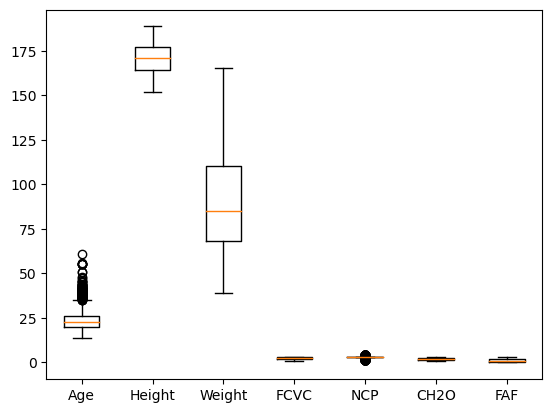

In [25]:
# Visualizing the distribution of various categorical features after dropping outliers based on the case

plt.boxplot(x=[dataset['Age'], dataset['Height'], dataset['Weight'], dataset['FCVC'], dataset['NCP'], dataset['CH2O'], dataset['FAF']])
plt.xticks([1,2,3,4,5,6,7],['Age', 'Height', 'Weight','FCVC', 'NCP', 'CH2O', 'FAF'])

plt.show()

In [26]:
# Check and drop duplicates

duplicated = dataset.duplicated()
print("Duplicate Rows:")
print(dataset[duplicated])
dataset=dataset.drop_duplicates()

Duplicate Rows:
     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
209  Female  22.0   169.0    65.0                            yes  yes   2.0   
460  Female  18.0   162.0    55.0                            yes  yes   2.0   
467    Male  22.0   174.0    75.0                            yes  yes   3.0   
496    Male  18.0   172.0    53.0                            yes  yes   2.0   

     NCP        CAEC SMOKE  CH2O SCC  FAF  TUE       CALC  \
209  3.0   Sometimes    no   2.0  no  1.0  1.0  Sometimes   
460  3.0  Frequently    no   1.0  no  1.0  1.0         no   
467  3.0  Frequently    no   1.0  no  1.0  0.0         no   
496  3.0   Sometimes    no   2.0  no  0.0  2.0  Sometimes   

                    MTRANS           NObeyesdad  
209  Public_Transportation        Normal_Weight  
460  Public_Transportation        Normal_Weight  
467             Automobile        Normal_Weight  
496  Public_Transportation  Insufficient_Weight  


In [27]:
dataset.duplicated().sum()

0

In [28]:
# Dimensions of the dataset

dataset.shape

(1797, 17)

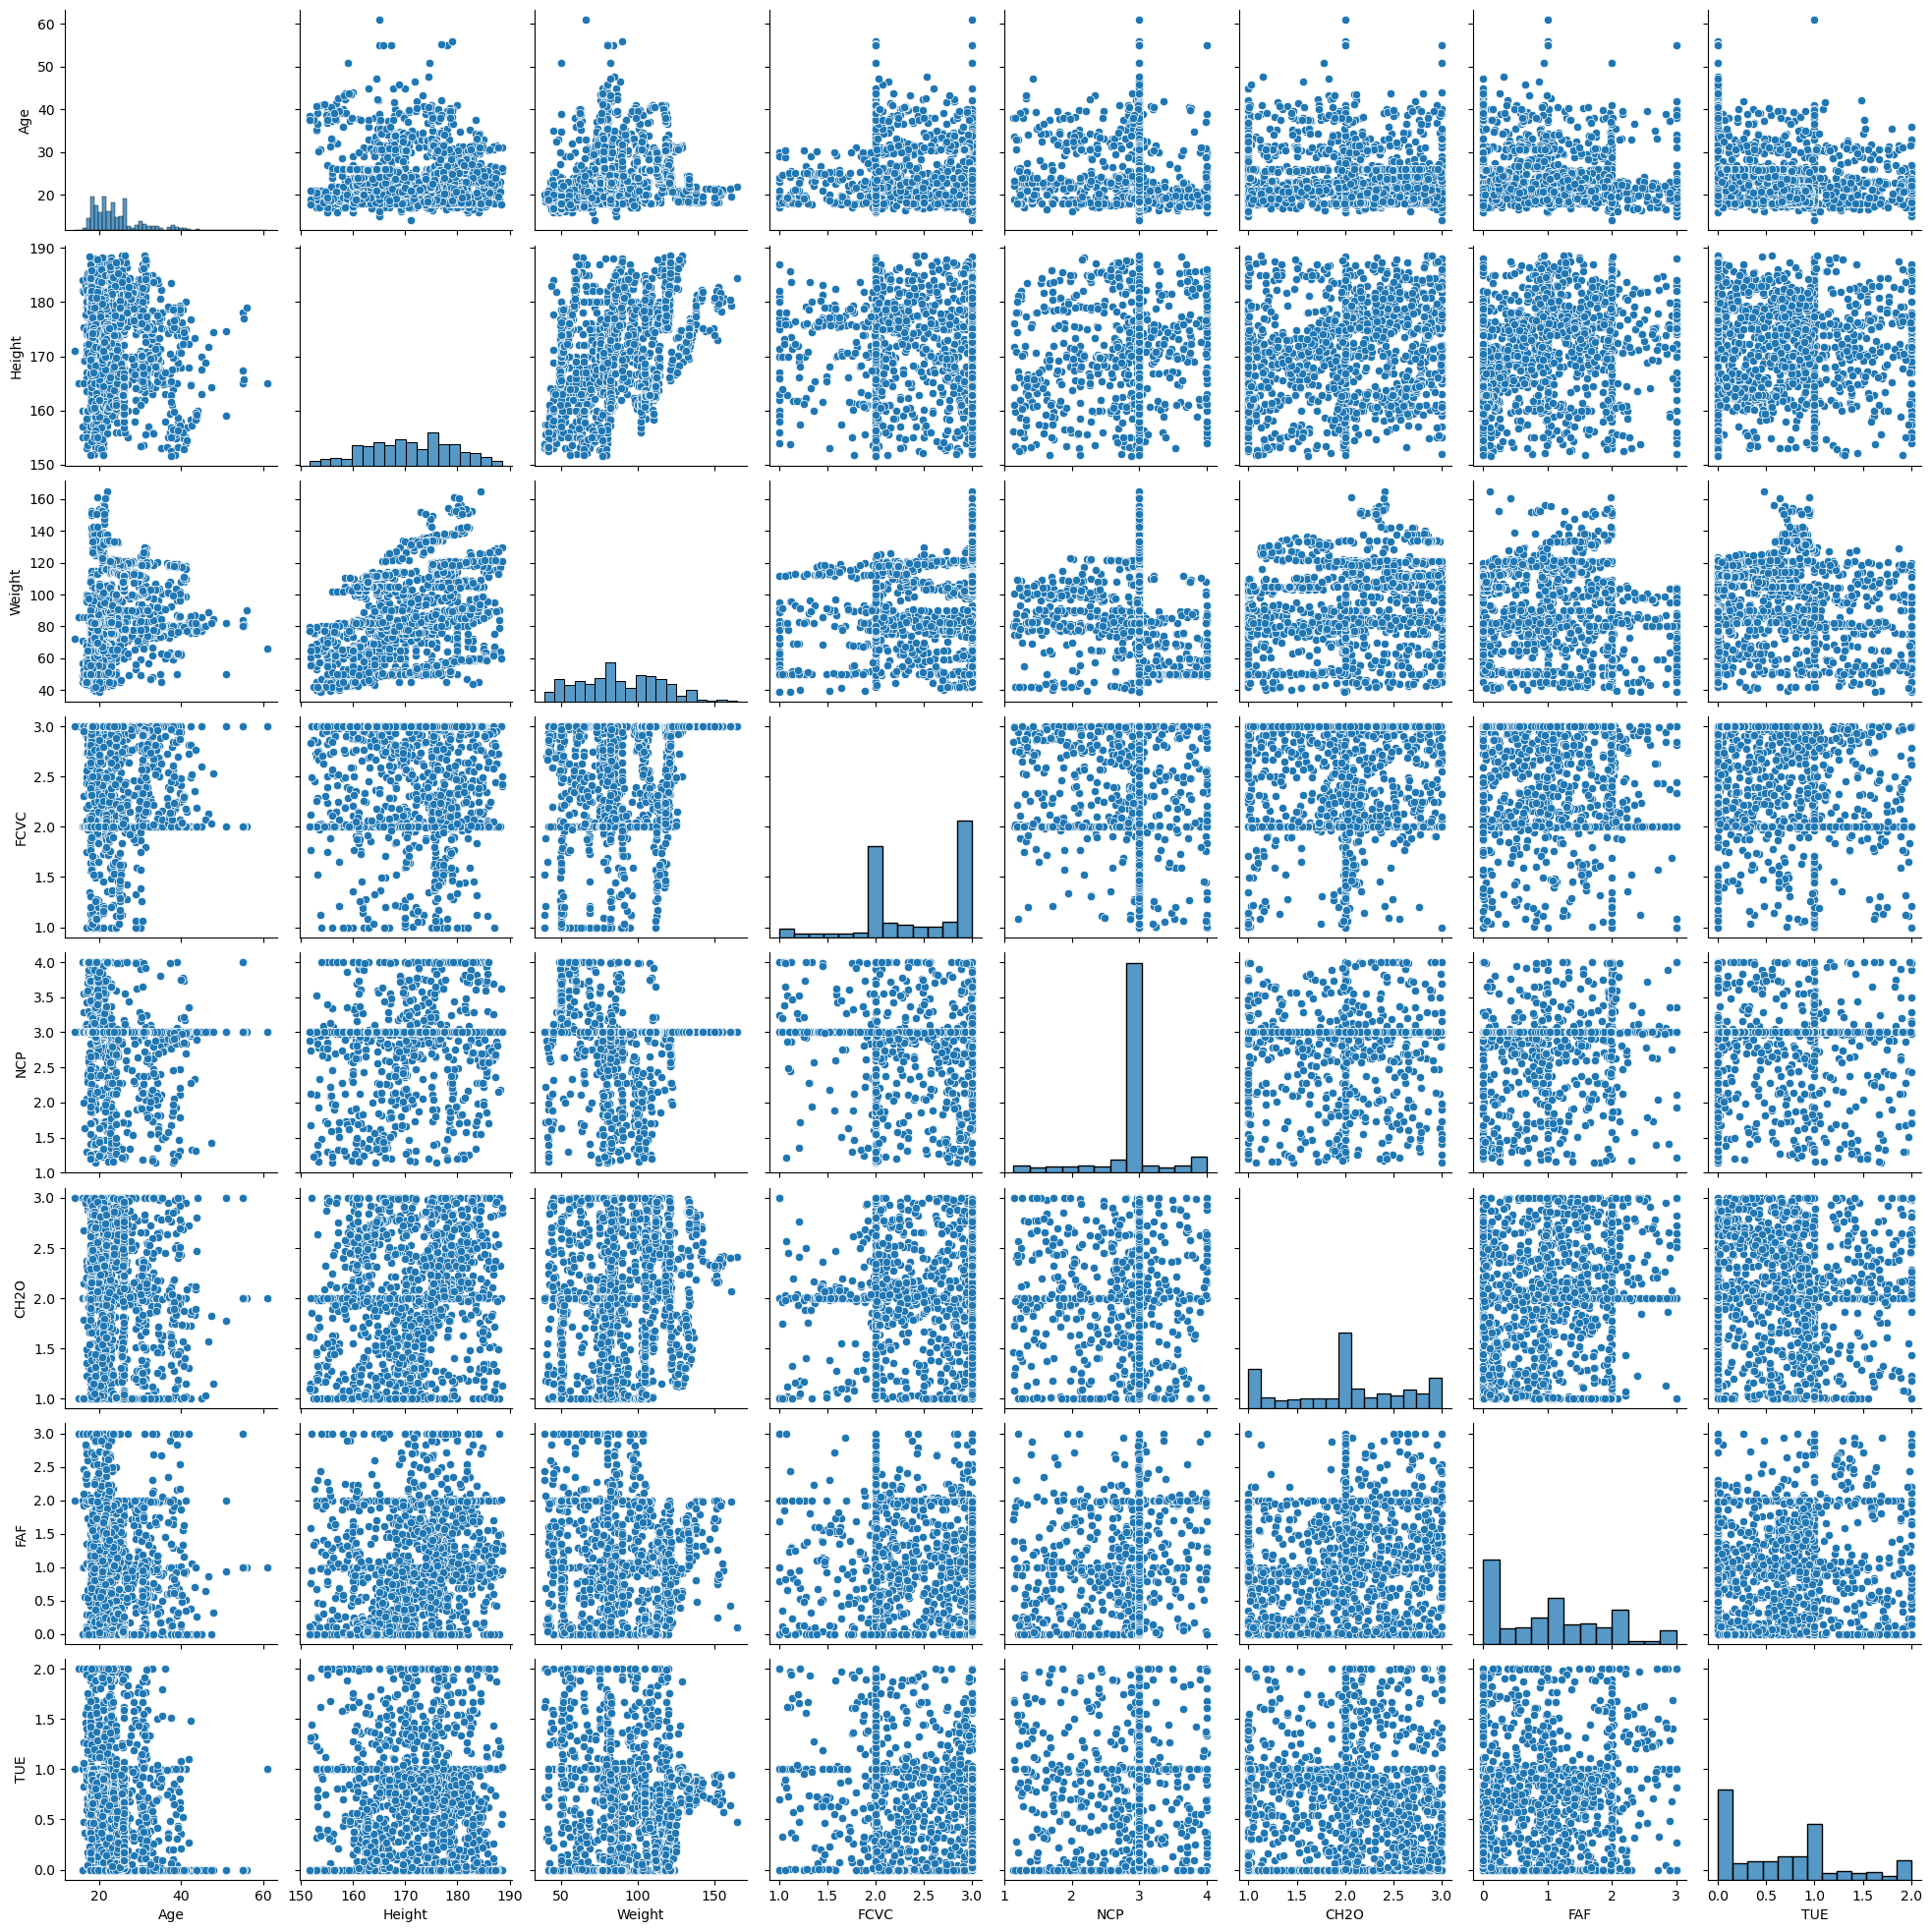

In [29]:
# Visualizing relationships between numerical variables

sns.pairplot(dataset.iloc[:,[1,2,3,6,7,10,12,13]])

<Axes: xlabel='Age', ylabel='Height'>

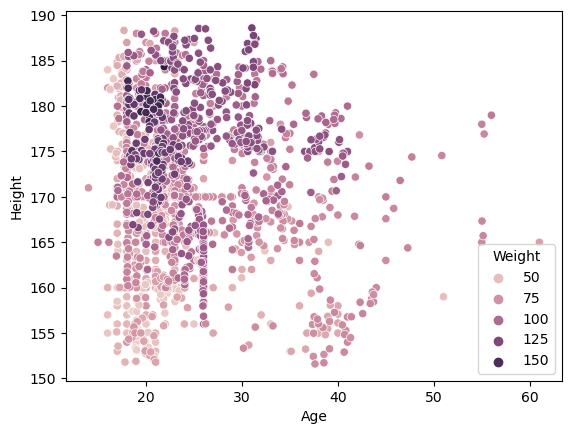

In [30]:
# Observe the relationship between 'Age' and 'Height' considering the 'Weight'

sns.scatterplot(data=dataset, x='Age', y='Height', hue='Weight')

In [31]:
# Encoding categorical columns using numerical labels

categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'TUE', 'CALC', 'MTRANS','NObeyesdad']

label_encoder = LabelEncoder()

for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [32]:
# Preview normalized dataset

dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,162.0000,64.000000,1,0,2.0,3.0,3,0,2.000000,0,0.000000,786,2,3,1
1,0,21.000000,152.0000,56.000000,1,0,3.0,3.0,3,1,3.000000,1,3.000000,0,1,3,1
2,1,23.000000,180.0000,77.000000,1,0,2.0,3.0,3,0,2.000000,0,2.000000,786,0,3,1
3,1,27.000000,180.0000,87.000000,0,0,3.0,3.0,3,0,2.000000,0,2.000000,0,0,4,5
5,1,29.000000,162.0000,53.000000,0,1,2.0,3.0,3,0,2.000000,0,0.000000,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,171.0730,131.408528,1,1,3.0,3.0,3,0,1.728139,0,1.676269,701,1,3,4
2107,0,21.982942,174.8584,133.742943,1,1,3.0,3.0,3,0,2.005130,0,1.341390,434,1,3,4
2108,0,22.524036,175.2206,133.689352,1,1,3.0,3.0,3,0,2.054193,0,1.414209,468,1,3,4
2109,0,24.361936,173.9450,133.346641,1,1,3.0,3.0,3,0,2.852339,0,1.139107,425,1,3,4


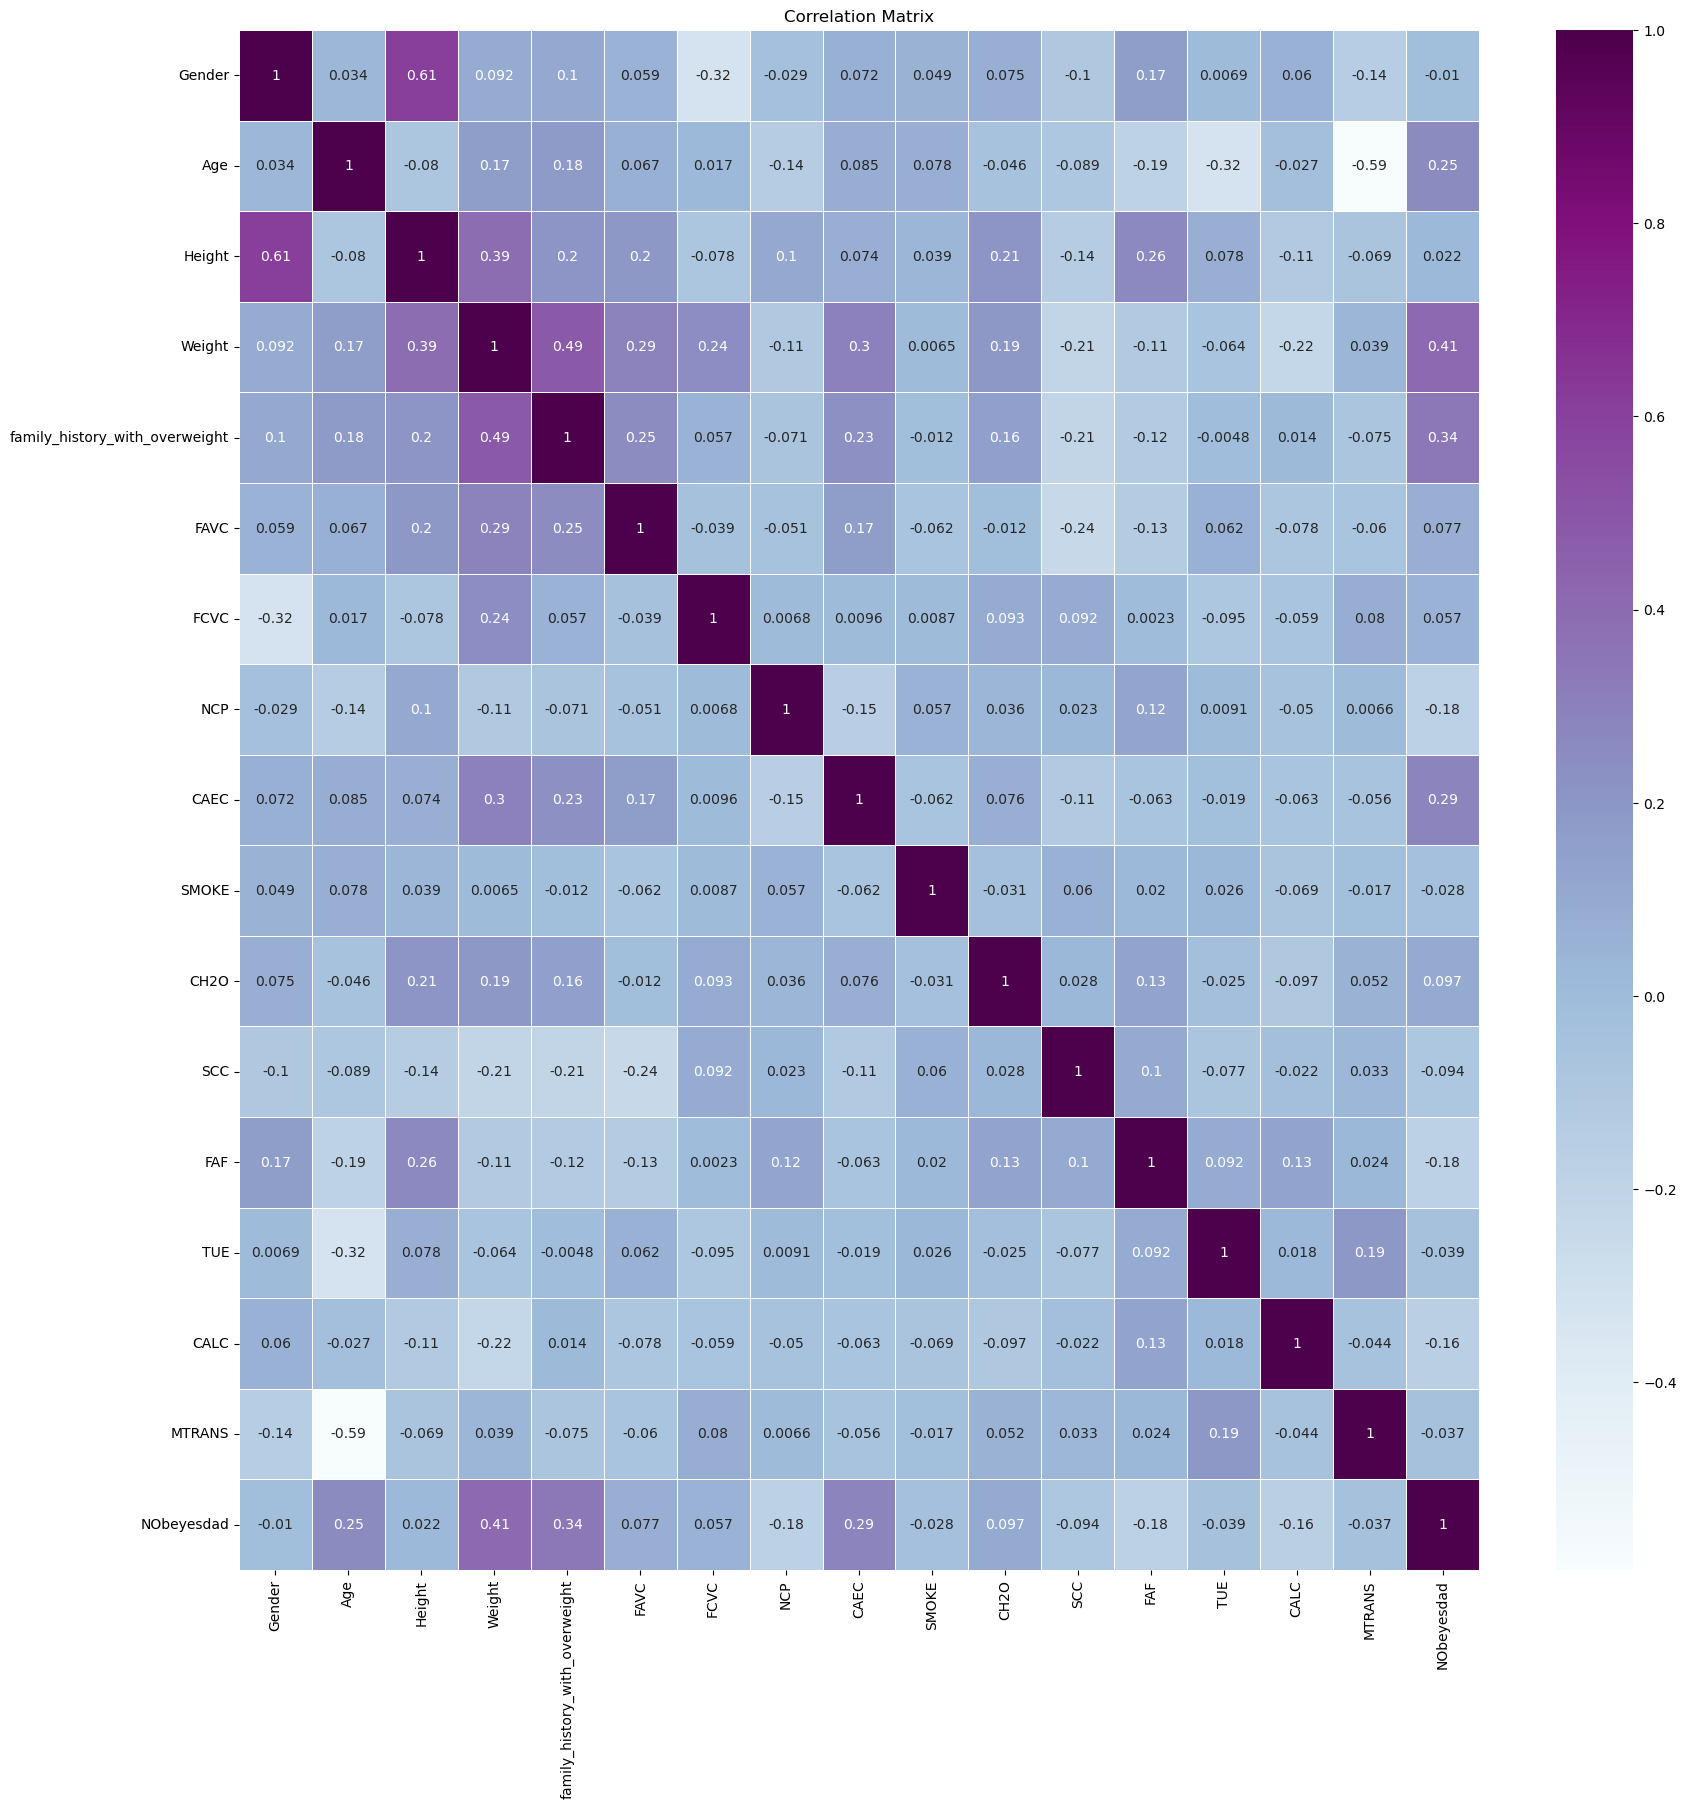

In [33]:
# Plot the correlation matrix for numeric features

numeric_dataset = dataset.select_dtypes(include='number') 
correlation_matrix = numeric_dataset.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

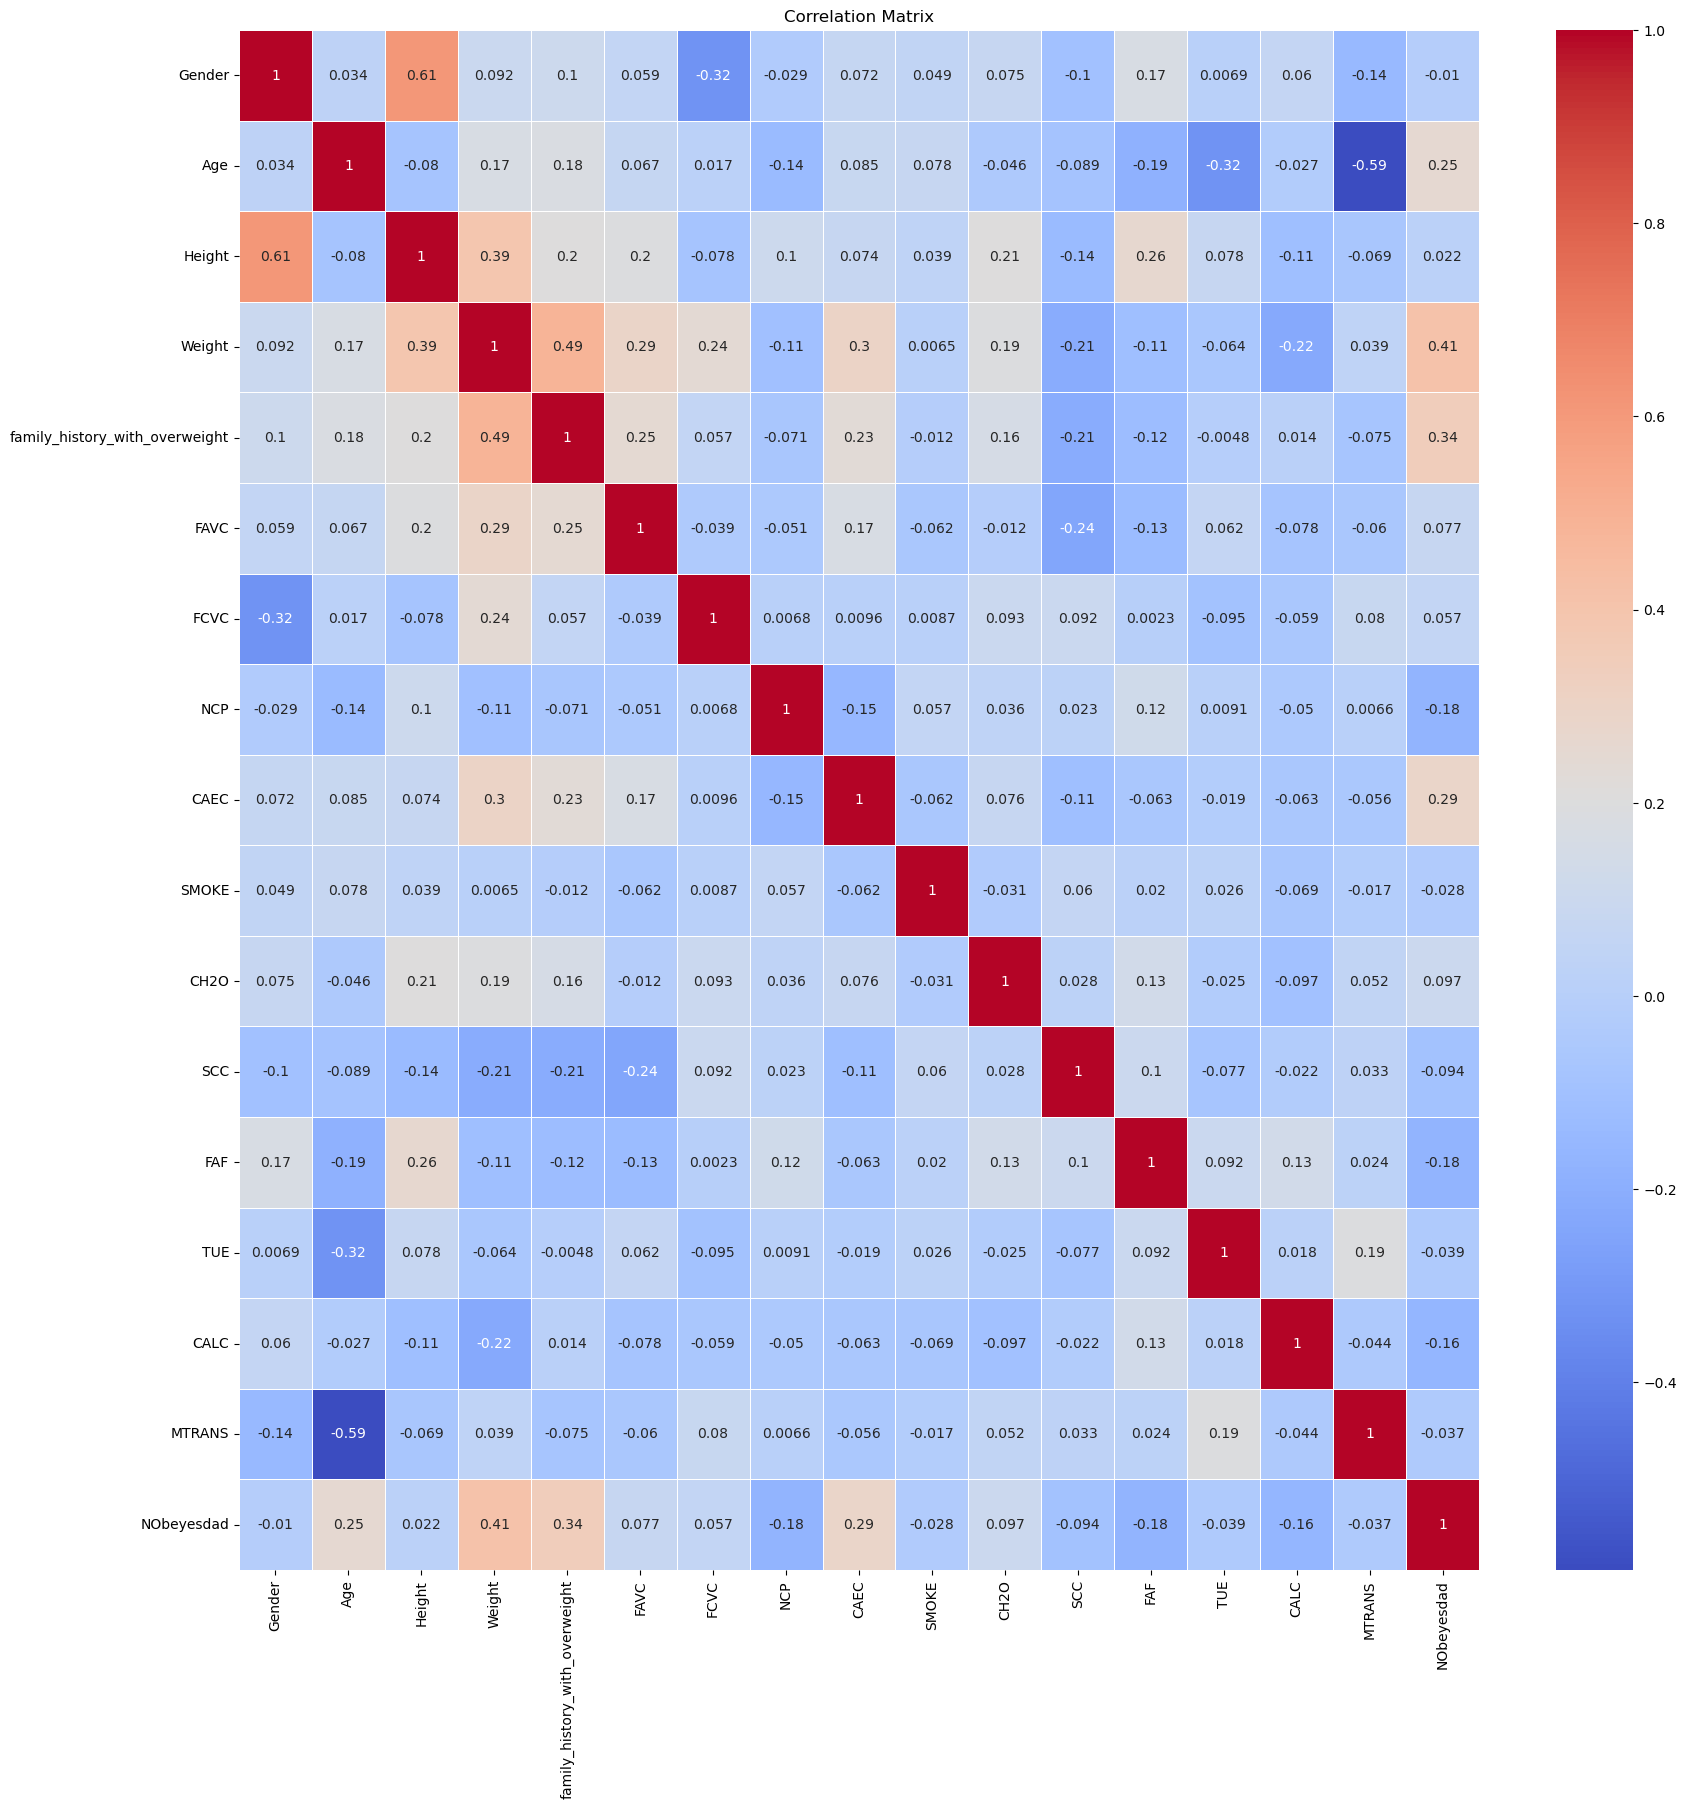

In [34]:
# Visualizing relationships between variables in the dataset after one-hot encoding

encoded_dataset = pd.get_dummies(dataset) 

correlation_matrix = encoded_dataset.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [35]:
# Data preprocessing (Standardization) on selected features based on the case

X = dataset.drop('NObeyesdad', axis=1)
X=dataset.iloc[:,[1,6]].values
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
y_true = dataset['NObeyesdad']

In [36]:
# Clustering

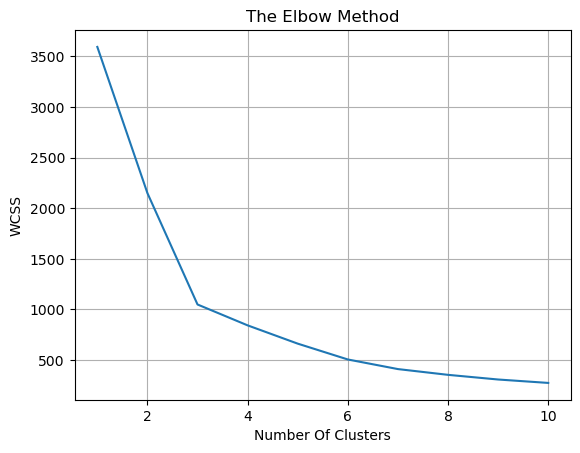

In [37]:
# Elbow Method applied

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.grid(visible=True)
plt.show()

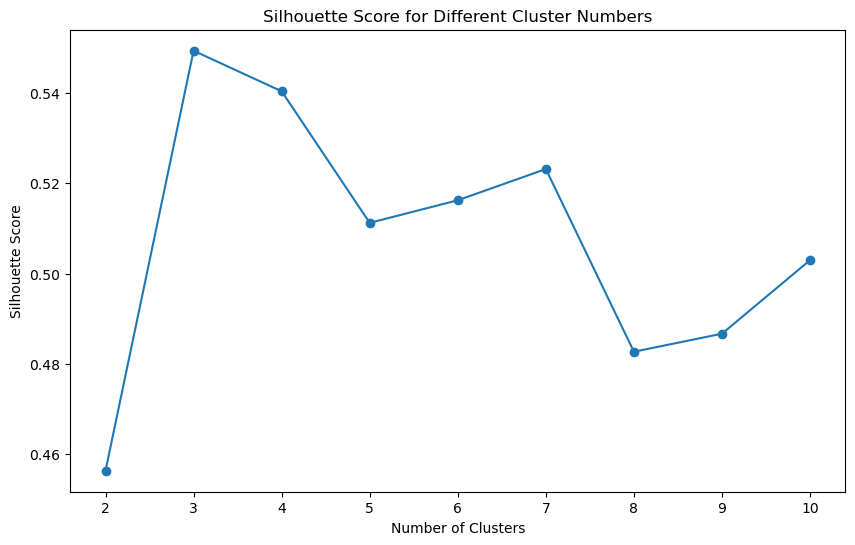

Optimal Number of Clusters: 3


In [47]:
# Evaluate the clustering using silhouette score

from sklearn.metrics import silhouette_score
cluster_range = range(2, 11) 

silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Cluster Numbers')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal Number of Clusters: {optimal_clusters}")

In [71]:
# KMeans clustering

kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X)
dataset['Cluster'] = y_kmeans

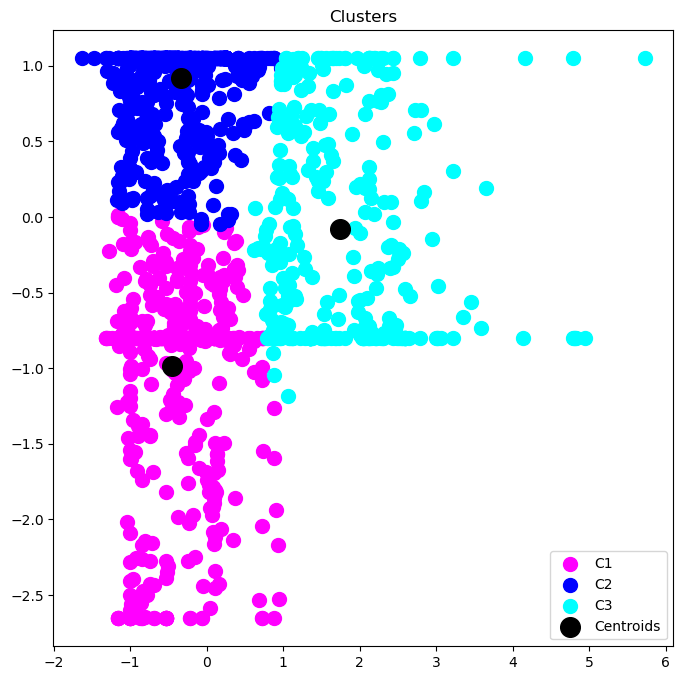

In [72]:
# Visualize the results of the KMeans

plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s=100, c='Magenta',label='C1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s=100, c='Blue',label='C2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s=100, c='Cyan',label='C3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200, c='black',label='Centroids')
plt.title('Clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [73]:
# Principal Component Analysis (PCA) for dimensionality reduction

pca=PCA(n_components=2)
X_reduced=pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.50829464, 0.49170536])

In [74]:
sum(pca.explained_variance_ratio_)

1.0

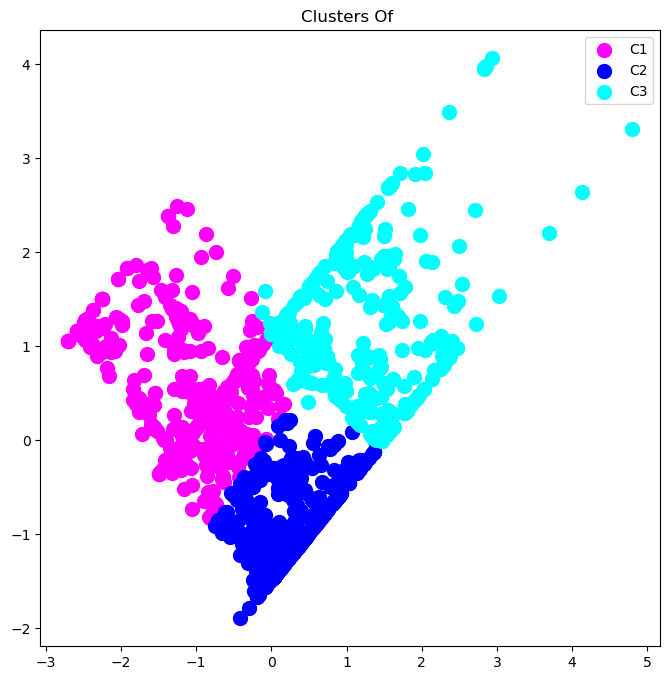

In [75]:
# Visual representation of the clustered data points in a reduced two-dimensional space

colors=['magenta','blue','cyan']

plt.figure(figsize=(8,8))
for i in range(3):
    plt.scatter(X_reduced[y_kmeans==i,0], X_reduced[y_kmeans==i,1], s=100, c=colors[i], label='C'+str(i+1))
plt.title('Clusters Of ')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [44]:
# Hierarchical clustering (Agglomerative clustering)

hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc=hc.fit_predict(X)

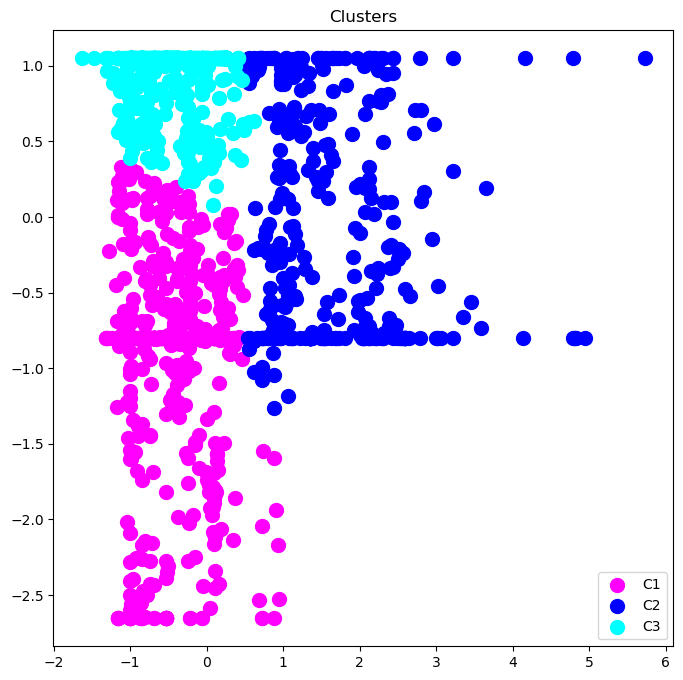

In [45]:
# Visualize the results of the Hierarchical

plt.figure(figsize=(8,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1], s=100, c='Magenta',label='C1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1], s=100, c='Blue',label='C2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1], s=100, c='Cyan',label='C3')
plt.title('Clusters')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

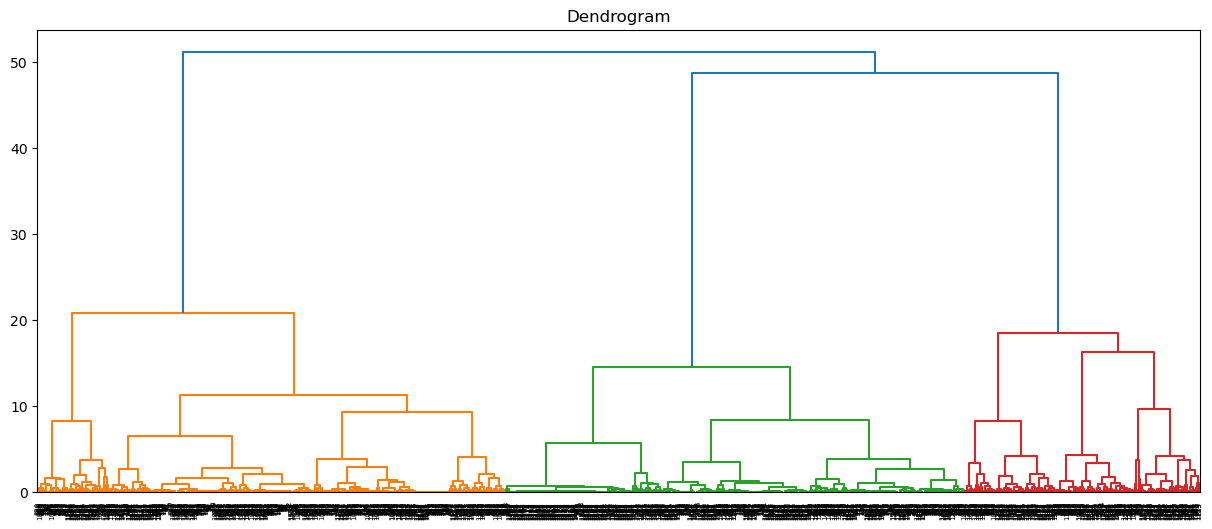

In [76]:
# Visualizes the merging of clusters

plt.figure(figsize=(15,6))
dendrogram=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('')
plt.ylabel('')
plt.show()

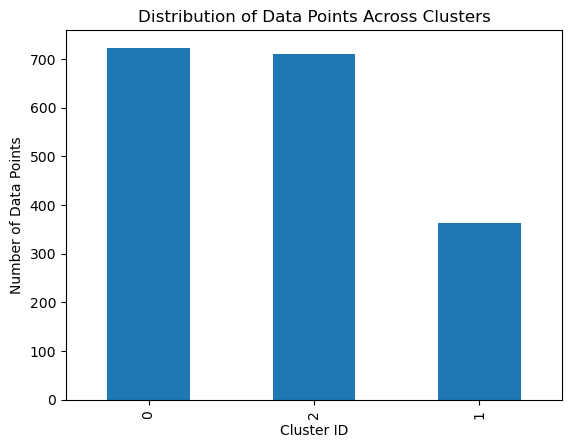

In [46]:
# Visualizes the distribution of data points across clusters

X['h_clusterid'] : hc.labels_

clusters_dataset = pd.DataFrame({'Clusters': hc.labels_})

clusters_dataset['Clusters'].value_counts().plot.bar()
plt.xlabel('Cluster ID')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()

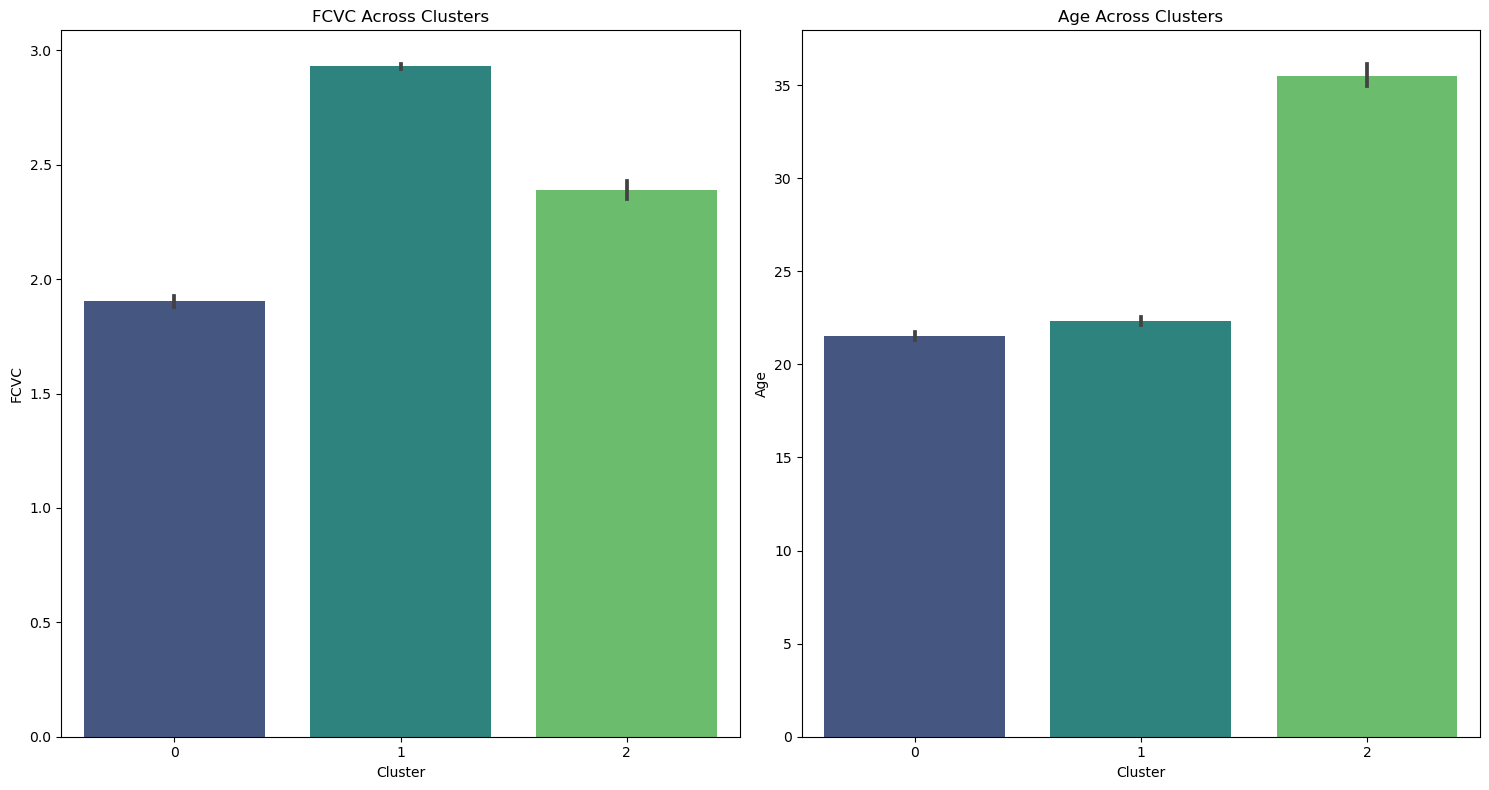

In [95]:
# Plot of two concidered features

clusters = dataset['Cluster'].unique()

features_to_compare = ['FCVC', 'Age']

plt.figure(figsize=(15, 8))

for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(1, len(features_to_compare), i)
    sns.barplot(x='Cluster', y=feature, data=dataset, palette='viridis')
    plt.title(f'{feature} Across Clusters')

plt.tight_layout()
plt.show()

In [86]:
# Encode the target variable if it contains non-numeric values

label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_true)

In [87]:
# K-means clustering

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
ari_kmeans = adjusted_rand_score(y_true_encoded, kmeans_labels)
print(f"Adjusted Rand Index for K-means: {ari_kmeans}")


# Hierarchical clustering (Agglomerative Clustering)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)
ari_hierarchical = adjusted_rand_score(y_true_encoded, hierarchical_labels)
print(f"Adjusted Rand Index for Hierarchical Clustering: {ari_hierarchical}")

Adjusted Rand Index for K-means: 0.12366152903434988
Adjusted Rand Index for Hierarchical Clustering: 0.13441133890837956


In [89]:
# K-means clustering

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score for K-means: {silhouette_kmeans}")


# Hierarchical clustering (Agglomerative Clustering)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)
silhouette_hierarchical = silhouette_score(X, hierarchical_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}")

Silhouette Score for K-means: 0.5493652543270106
Silhouette Score for Hierarchical Clustering: 0.5349567233291154
